# SMS Spam Classifier Using Logistic Regression on TensorFlow

This notebook accompanies my talk on "Building a SMS Spam Classifier Using Logistic Regression and NaiveBayes". The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


In [1]:
import os
import csv
import sklearn.utils

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from os.path import join
from textblob import TextBlob
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  

Loading the dataset into a Panda Dataframe df_sms_messages

In [2]:
path = os.getcwd()
df_sms_messages = pd.read_csv(join(path, 'SMSSpamCollection.data'), sep='\t', quoting=csv.QUOTE_NONE, names=["label", "message"])


In [3]:
# Check the size of the data frame
df_sms_messages.shape

(5574, 2)

We will proceed to shuffle the data in the DataFrame df_sms_message so we can achieve a good mix of both spam and ham (non-spam) messages

In [4]:
# 2 alternative methods we can use to shuffle data in the dataframe
df_sms_messages = df_sms_messages.sample(frac=1).reset_index(drop=True) # option 1
# df_sms_messages = sklearn.utils.shuffle(df_sms_messages) # option 2

Lets take out a sample of 10 messages, to gain insight of how the data appears in the dataset

In [5]:
# print df_sms_messages.dtypes.index # returns feaature names (label, message)
df_sms_messages[0:10] # returns the first 10 messages in the dataframe

,label,message
0,ham,Fffff. Can you text kadeem or are you too far ...
1,ham,Wat uniform? In where get?
2,ham,Ha. You don‘t know either. I did a a clever bu...
3,spam,Reply to win £100 weekly! Where will the 2006 ...
4,ham,Yeah so basically any time next week you can g...
5,ham,Wanna do some art?! :D
6,ham,Yup
7,spam,Warner Village 83118 C Colin Farrell in SWAT t...
8,ham,Did he just say somebody is named tampa
9,ham,Goodmorning sleeping ga.


In [6]:
# Function to split the message to lemmas, to be used as the analyzer in the CountVectorizer function
def lemmatize(message):
    message = message.lower()
    words = TextBlob(message).words
    return [word.lemma for word in words]

In [7]:
BOW_transform = CountVectorizer(analyzer=lemmatize).fit(df_sms_messages['message'])

In [8]:
print(BOW_transform.transform([df_sms_messages['message'][3]]))

  (0, 473)	1
  (0, 896)	1
  (0, 1549)	1
  (0, 2479)	1
  (0, 3012)	1
  (0, 3270)	1
  (0, 3890)	1
  (0, 6504)	1
  (0, 6821)	1
  (0, 6844)	1
  (0, 7345)	1
  (0, 7684)	1
  (0, 7812)	3
  (0, 8393)	1
  (0, 8445)	1
  (0, 8482)	1
  (0, 8485)	1
  (0, 8563)	1
  (0, 8820)	1


Lets do a cross comparison of the data and the Bag of Words result for message 3

In [9]:
print ('length of the vector is:', BOW_transform.transform([df_sms_messages['message'][3]]).shape[1])

length of the vector is: 8874


In [10]:
print (BOW_transform.get_feature_names()[2250])

come


In [11]:
df_sms_messages['message'][3]

'Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service'

In [12]:
# Get the BOW for the whole corpus
BOW = BOW_transform.transform(df_sms_messages['message'])

In [13]:
print ('Shape of the large transformed matrix is:', BOW.shape, 'i.e', BOW.shape[0], 'rows that corresponds to the number of messages and', BOW.shape[1], 'columns for each of the message that corresponds to the total number of unique words in the dataset')

Shape of the large transformed matrix is: (5574, 8874) i.e 5574 rows that corresponds to the number of messages and 8874 columns for each of the message that corresponds to the total number of unique words in the dataset


Implementing the Term Frequency-Inverse Document: reflects how important a word is to a document in a corpus

In [14]:
tfidf_BOW = TfidfTransformer().fit(BOW)

In [15]:
# Check the tf-idf representation for message 3
print (tfidf_BOW.transform(BOW[3]))

  (0, 8820)	0.241033220189
  (0, 8563)	0.222387531455
  (0, 8485)	0.197637166716
  (0, 8482)	0.139721113506
  (0, 8445)	0.182915887329
  (0, 8393)	0.237936760376
  (0, 7812)	0.244578526253
  (0, 7684)	0.0996689844595
  (0, 7345)	0.174764513522
  (0, 6844)	0.196161369688
  (0, 6821)	0.163012414996
  (0, 6504)	0.175036573381
  (0, 3890)	0.316674876809
  (0, 3270)	0.331732230929
  (0, 3012)	0.212946291322
  (0, 2479)	0.27196413721
  (0, 1549)	0.139615763068
  (0, 896)	0.297704854095
  (0, 473)	0.331732230929


Lets do more Inspection....

In [16]:
print ('inverse document frequnency of the word "to" is:', tfidf_BOW.idf_[BOW_transform.vocabulary_['to']])

inverse document frequnency of the word "to" is: 2.19534051378


In [17]:
converted_messages = tfidf_BOW.transform(BOW)

In [18]:
print(converted_messages)

  (0, 8752)	0.243536647893
  (0, 7862)	0.268316855572
  (0, 7647)	0.234634598341
  (0, 5700)	0.196681297246
  (0, 4493)	0.444655246238
  (0, 3657)	0.366572796645
  (0, 3261)	0.482060678349
  (0, 3213)	0.366572796645
  (0, 1954)	0.199765829981
  (0, 1300)	0.190264646738
  (1, 8445)	0.40005572028
  (1, 8346)	0.407796835332
  (1, 8073)	0.725532257049
  (1, 4183)	0.239005696694
  (1, 3586)	0.300227218442
  (2, 8752)	0.0894442013436
  (2, 8510)	0.149365797368
  (2, 7719)	0.19709055751
  (2, 7684)	0.106387825825
  (2, 6990)	0.286519624593
  (2, 5884)	0.317773601652
  (2, 5868)	0.354094816917
  (2, 5723)	0.222722470654
  (2, 4576)	0.162230513704
  (2, 4102)	0.0797439871324
  :	:
  (5571, 2342)	0.263684079204
  (5571, 1646)	0.254788417186
  (5571, 1370)	0.114137293401
  (5571, 1300)	0.109022053825
  (5571, 1144)	0.12594741831
  (5571, 452)	0.112465434871
  (5572, 8752)	0.173407286605
  (5572, 7819)	0.344623610146
  (5572, 7728)	0.297189032531
  (5572, 7666)	0.411098411819
  (5572, 4013)	0.3778

In [19]:
# print out an array
print(converted_messages.toarray())

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [20]:
# convert to a dataFrame
df_converted_messages = pd.DataFrame(converted_messages.todense())
df_converted_messages.shape

(5574, 8874)

Before we embark on training, let do the 80/20 training set - test set split

In [21]:
# Divide the dataFrame into training set (80%) and test set (20%) - Option 1
# df_train_X = df_converted_messages.sample(frac=0.8,random_state=200)
# df_test_X = df_converted_messages.drop(train.index)

# Divide the dataFrame into training set (80%) and test set (20%) - Option 2
top80 = round(df_converted_messages.shape[0]*0.8)
bottom20 = df_converted_messages.shape[0] - top80

df_train_X = df_converted_messages.head(top80)
df_test_X = df_converted_messages.head(bottom20)

In [22]:
df_train_X

,0,1,2,3,4,5,6,7,8,9,...,8864,8865,8866,8867,8868,8869,8870,8871,8872,8873
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For logistic regression, we are intrested in a binary represntation of the Labels. So we will go ahead and replace labels Spam with 0 and labels Ham with 1

In [23]:
# replace the values spam  with 0 and ham with 1
df_sms_messages.replace(to_replace=dict(ham=1, spam=0), inplace=True)

In [24]:
df_sms_messages['message'][6]

'Yup'

In [25]:
df_sms_messages['label'][6]

1

Lets look at labels for the first 10 messages

In [26]:
df_labels = pd.DataFrame(df_sms_messages['label'])
df_labels = df_labels.rename(columns = {'label':0}) #change the column name from label to 0
df_labels[0:10] # return the first 10 labels

,0
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,1
9,1


Our classifier will output two classes, SPAM and HAM, with the value of 1 on either indicating the positive class. This means we will have to convert the labels into $\mathbb{R}^2$ since $ \text{Y} \in (0,1)$ as seen below:

In [27]:
# Converting the labels
def append_opposites(df):
    # Create a list to store the data
    label_opp = []

    # For each row in the column,
    for row in df[0]:
        # if more than a value,
        if row > 0:
            # value is 1 append the negated value of 0
            label_opp.append(0)
        # otherwise,
        else:
            # value is 0 append the negated value of 1
            label_opp.append(1)
            
    # Create a column from the list
    df[1] = label_opp       

In [28]:
append_opposites(df_labels) #append opposites to the labels
df_labels[0:10] # return the first 10 labels

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,1,0


Before we embark on training, let do the 80/20 training set - test set split on the labels to correspond with the split done above.

In [29]:
# Divide the labels into training set (80%) and test set (20%) to correspond with the input
top80 = round(df_labels.shape[0]*0.8)
bottom20 = df_labels.shape[0] - top80

df_train_Y = df_labels.head(top80)
df_test_Y = df_labels.head(bottom20)

print ('Shape of the large subdivided training label matrix is:', df_train_Y.shape, 'i.e', df_train_Y.shape[0], 'rows that corresponds to the number of labels and', df_train_Y.shape[1], 'columns for each of the label in the training dataset')

Shape of the large subdivided training label matrix is: (4459, 2) i.e 4459 rows that corresponds to the number of labels and 2 columns for each of the label in the training dataset


In [30]:
# Global Parameteres
numFeatures = df_train_X.as_matrix().shape[1] # number of words extracted from each sms in the BOW feature matrix
numLabels = df_train_Y.as_matrix().shape[1] # number of classes we are predicting

print(numLabels) # number of classes we are predicting is 2 (Ham or Spam)

2


Lets build the TensorFlow Model and proceed to training

In [31]:
# Convert the dataFrames into matrices to be used in training
trainX = df_train_X.as_matrix()
testX = df_test_X.as_matrix()
trainY = df_train_Y.as_matrix()
testY = df_test_Y.as_matrix()

# number of times we iterate over the data
# tensorboard shows that accuracy plateus at ~25k epochs
training_epochs = 15000 #27000 

# learning_rate = 0.1
# a smarter learning rate for gradientOptimizer
learning_rate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)


X = tf.placeholder(tf.float32, [None, numFeatures])
Y = tf.placeholder(tf.float32, [None, numLabels])

# Values are randomly sampled from a Gaussian with a standard deviation of: sqrt(6 / (numInputNodes + numOutputNodes + 1))
# W = tf.Variable(tf.ones([n_dim,2])) # initializing randomly
W = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                 mean=0,
                                 stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                 name="weights"))

b = tf.Variable(tf.random_normal([1,numLabels],
                                 mean=0,
                                 stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                 name="bias"))


# Add a model saver
saver =  tf.train.Saver()

# Initialize the variables
init = tf.initialize_all_variables()

In [36]:
y_ = tf.nn.sigmoid(tf.matmul(X,W) + b)
cost_function = tf.reduce_mean(tf.reduce_sum((-Y * tf.log(y_)) - ((1 - Y) * tf.log(1 - y_)), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Cost at Epoch 1000  2.40605735779
Cost at Epoch 2000  2.11413526535
Cost at Epoch 3000  1.88871967793
Cost at Epoch 4000  1.71557915211
Cost at Epoch 5000  1.58260440826
Cost at Epoch 6000  1.4801081419
Cost at Epoch 7000  1.40063786507
Cost at Epoch 8000  1.33857011795
Cost at Epoch 9000  1.2897092104
Cost at Epoch 10000  1.25093197823
Cost at Epoch 11000  1.21990942955
Cost at Epoch 12000  1.19489383698
Cost at Epoch 13000  1.1745672226
Cost at Epoch 14000  1.15793216228
Accuracy:  0.819731
Model saved in file:  trained_variables.ckpt


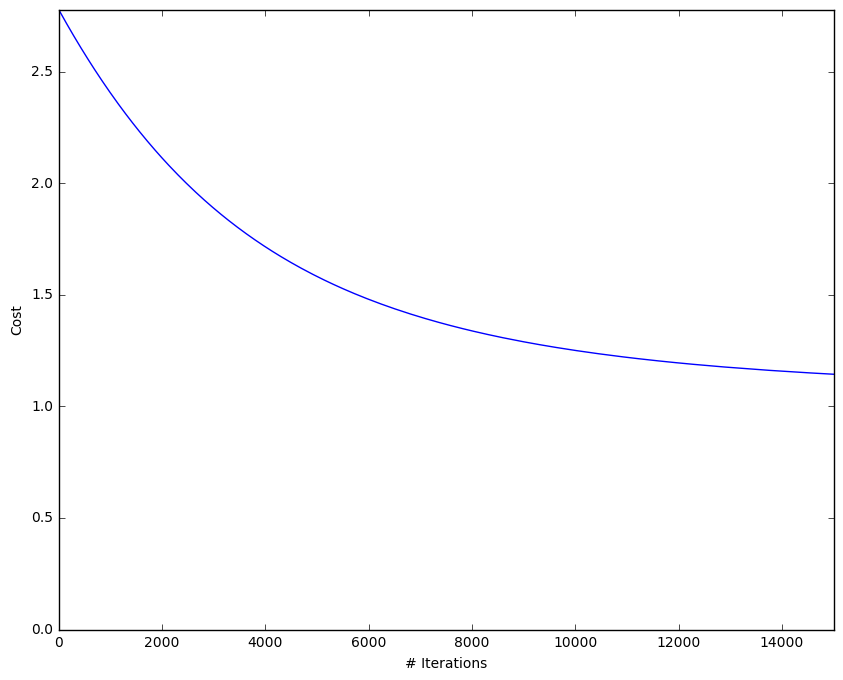

In [37]:
cost_history = np.empty(shape=[1],dtype=float)
print_iter = 1000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer,feed_dict={X:trainX,Y:trainY})
        cost_history = np.append(cost_history,sess.run(cost_function,feed_dict={X: trainX,Y: trainY}))
        if (epoch >= print_iter and epoch % print_iter == 0):
            print ("Cost at Epoch %d "%(epoch), cost_history[epoch])
    
    y_pred = sess.run(y_ , feed_dict={X: testX})
    correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy: ",(sess.run(accuracy, feed_dict={X: testX, Y: testY})))
    
    # Save variables to .ckpt file
    save_path = saver.save(sess, "trained_variables.ckpt")
    print ("Model saved in file: ", save_path)

    # Close tensorflow session
    sess.close()
    
    #plot cost
    fig = plt.figure(figsize=(10,8))
    plt.plot(cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.xlabel('# Iterations')
    plt.ylabel('Cost')
    plt.show() 